In [19]:
"""
    This notebook is used to generate the figures for the following section:
    "The Theory of Dynamic Input Conductances"
"""

'\n    This notebook is used to generate the figures for the following section:\n    "The Theory of Dynamic Input Conductances"\n'

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd

from stg import simulate_individual_t_eval, get_default_u0, get_default_parameters
import warnings
from stg import DICs

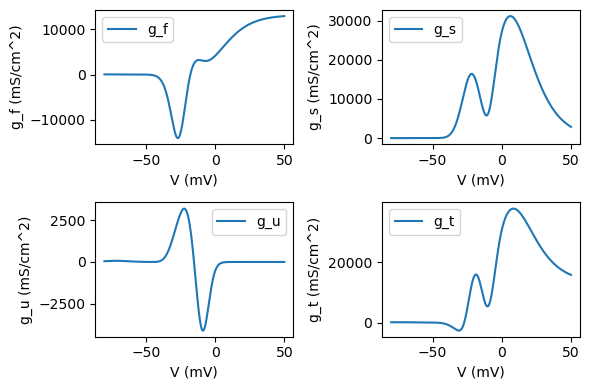

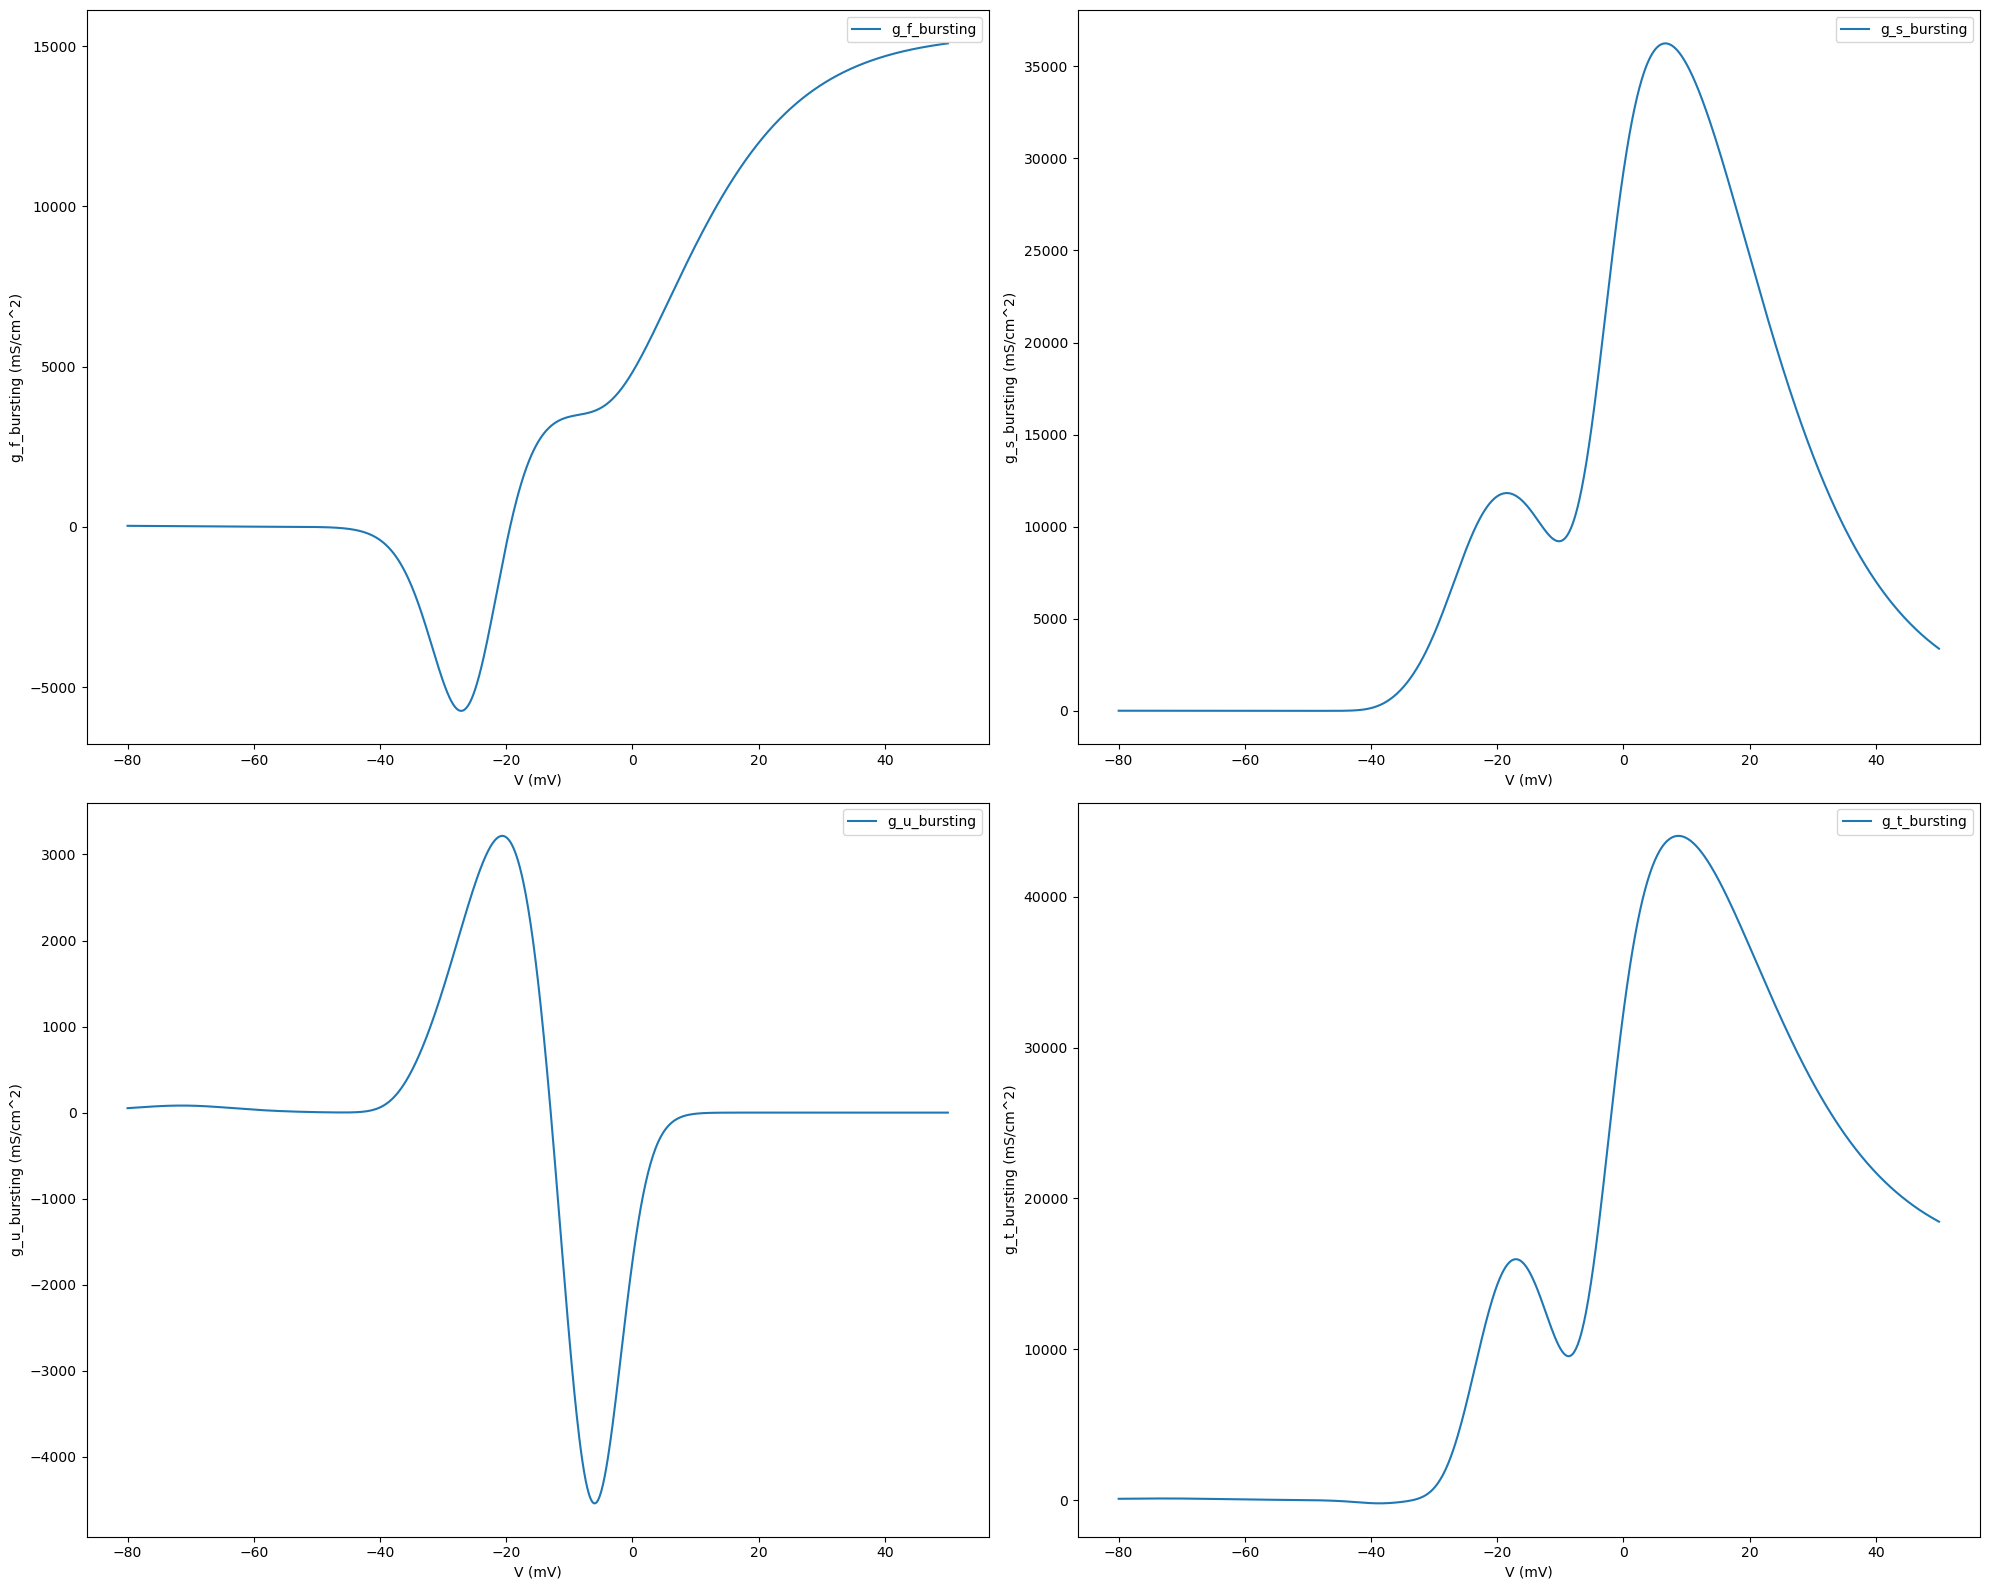

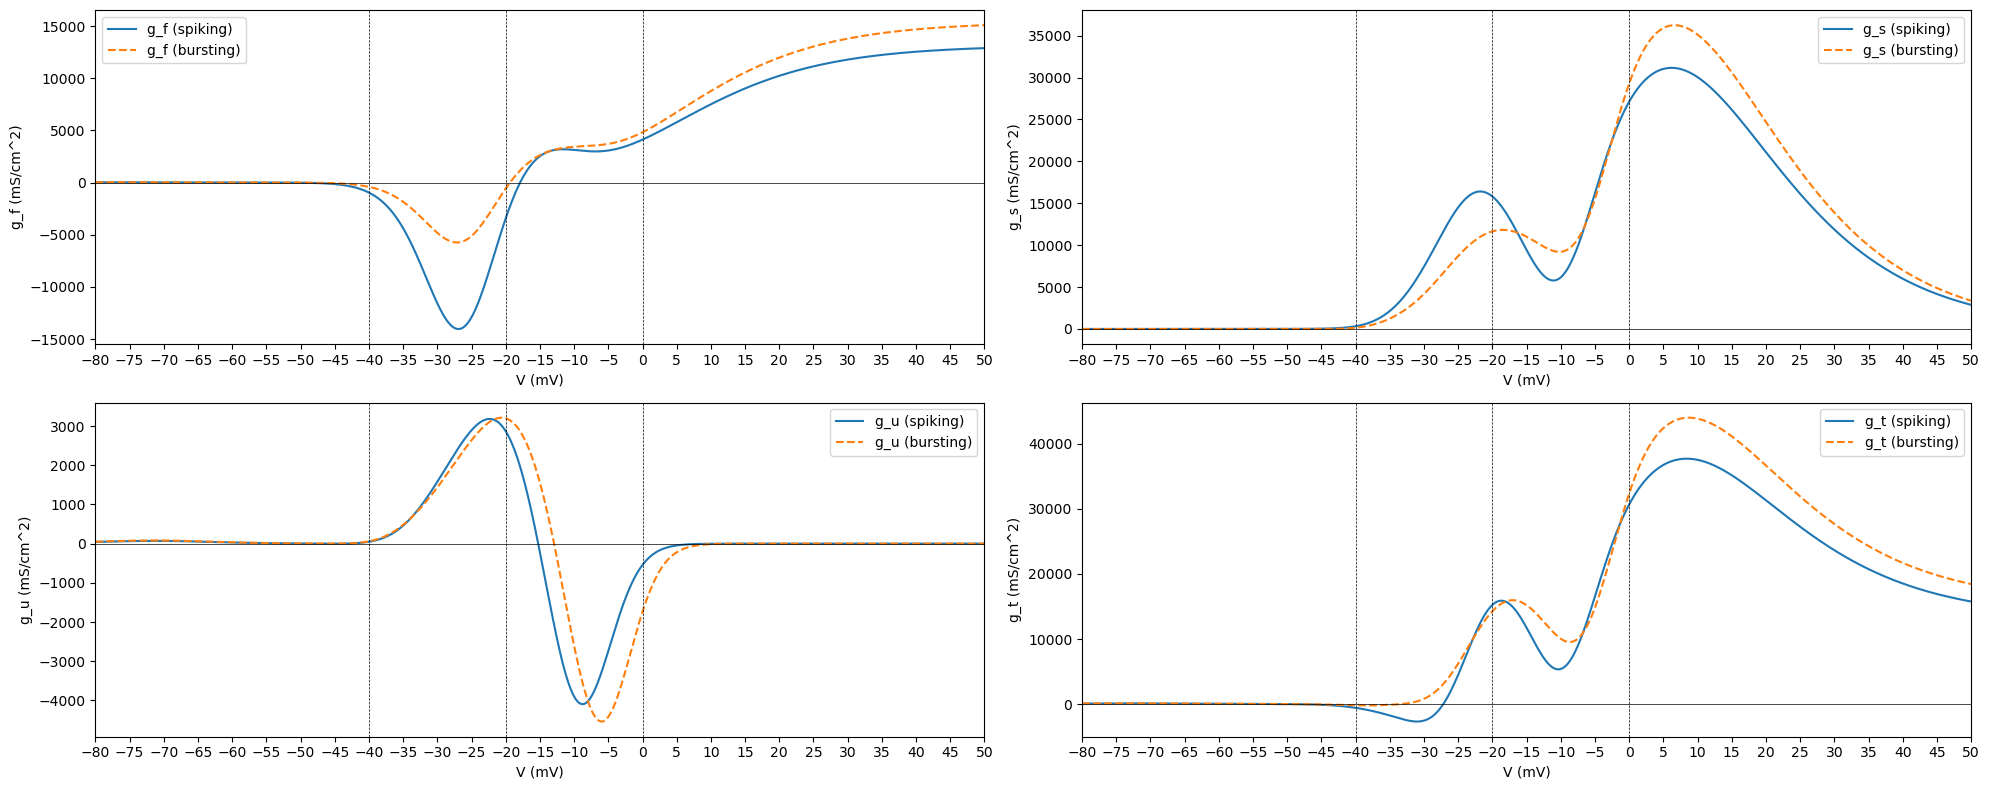

/home/julienbrandoit/Documents/Thesis/Thesis_doc/figures_bg_bio/utils.py:34: RuntimeWarning: overflow encountered in exp
  return A + B / (1 + np.exp((V + D) / C))


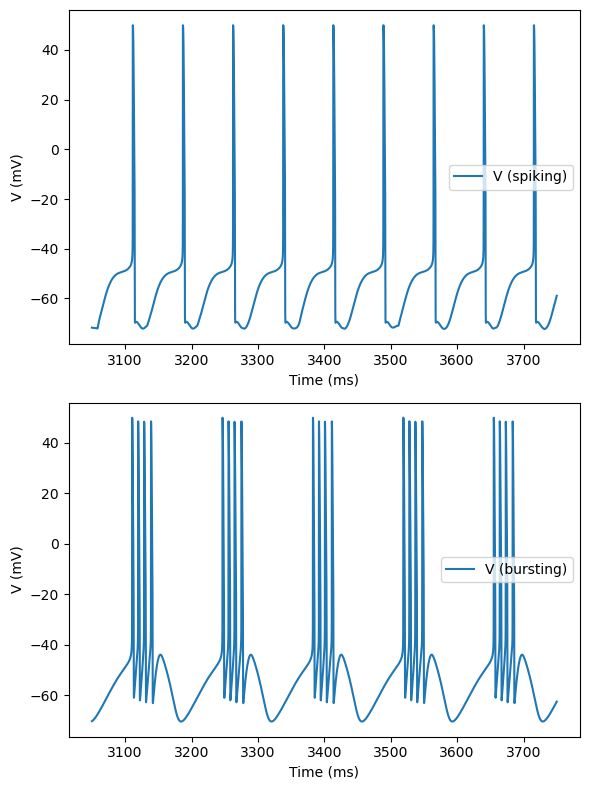

In [21]:
g_spiking = [6.60082471e+03, 1.25961075e+02, 4.14918208e+00, 1.83416405e+01, 1.59677516e+02, 4.13833466e+02, 3.21589451e-01, 9.57712096e-03]
V = np.linspace(-80, 50, 1000)

# plot the DICs
import stg
fig, ax = plt.subplots(2, 2, figsize=(6, 4))
dics = DICs(V, *g_spiking, **get_default_parameters(), normalize=True)
g_f, g_s, g_u, g_t = dics

ax[0, 0].plot(V, g_f, label='g_f')
ax[0, 0].set_xlabel('V (mV)')
ax[0, 0].set_ylabel('g_f (mS/cm^2)')
ax[0, 0].legend()

ax[0, 1].plot(V, g_s, label='g_s')
ax[0, 1].set_xlabel('V (mV)')
ax[0, 1].set_ylabel('g_s (mS/cm^2)')
ax[0, 1].legend()

ax[1, 0].plot(V, g_u, label='g_u')
ax[1, 0].set_xlabel('V (mV)')
ax[1, 0].set_ylabel('g_u (mS/cm^2)')
ax[1, 0].legend()

ax[1, 1].plot(V, g_t, label='g_t')
ax[1, 1].set_xlabel('V (mV)')
ax[1, 1].set_ylabel('g_t (mS/cm^2)')
ax[1, 1].legend()

plt.tight_layout()
plt.show()

g_bursting = [2.81751002e+03, 1.45852520e+02, 8.42704420e+00, 1.45818832e+01, 1.06575443e+02, 1.51625062e+02, 3.67655917e-01, 9.47267955e-03]

# plot the DICs

fig, ax = plt.subplots(2, 2, figsize=(20, 16))
dics = DICs(V, *g_bursting, **get_default_parameters(), normalize=True)
g_f_bursting, g_s_bursting, g_u_bursting, g_t_bursting = dics

ax[0, 0].plot(V, g_f_bursting, label='g_f_bursting')
ax[0, 0].set_xlabel('V (mV)')
ax[0, 0].set_ylabel('g_f_bursting (mS/cm^2)')
ax[0, 0].legend()

ax[0, 1].plot(V, g_s_bursting, label='g_s_bursting')
ax[0, 1].set_xlabel('V (mV)')
ax[0, 1].set_ylabel('g_s_bursting (mS/cm^2)')
ax[0, 1].legend()

ax[1, 0].plot(V, g_u_bursting, label='g_u_bursting')
ax[1, 0].set_xlabel('V (mV)')
ax[1, 0].set_ylabel('g_u_bursting (mS/cm^2)')
ax[1, 0].legend()

ax[1, 1].plot(V, g_t_bursting, label='g_t_bursting')
ax[1, 1].set_xlabel('V (mV)')
ax[1, 1].set_ylabel('g_t_bursting (mS/cm^2)')
ax[1, 1].legend()

plt.tight_layout()
plt.show()



# both on the same 

fig, ax = plt.subplots(2, 2, figsize=(20, 8))

# Plot spiking DICs
ax[0, 0].plot(V, g_f, label='g_f (spiking)')
ax[0, 1].plot(V, g_s, label='g_s (spiking)')
ax[1, 0].plot(V, g_u, label='g_u (spiking)')
ax[1, 1].plot(V, g_t, label='g_t (spiking)')

# Plot bursting DICs
dics_bursting = DICs(V, *g_bursting, **get_default_parameters(), normalize=True)
g_f_bursting, g_s_bursting, g_u_bursting, g_t_bursting = dics_bursting

ax[0, 0].plot(V, g_f_bursting, label='g_f (bursting)', linestyle='--')
ax[0, 1].plot(V, g_s_bursting, label='g_s (bursting)', linestyle='--')
ax[1, 0].plot(V, g_u_bursting, label='g_u (bursting)', linestyle='--')
ax[1, 1].plot(V, g_t_bursting, label='g_t (bursting)', linestyle='--')

# Set labels and legends
for i in range(2):
    for j in range(2):
        ax[i, j].set_xlabel('V (mV)')
        ax[i, j].set_ylabel(f'g_{["f", "s", "u", "t"][i*2+j]} (mS/cm^2)')
        ax[i, j].legend()
        ax[i, j].set_xlim(-80, 50)
        # add a line at 0
        ax[i, j].axhline(0, color='black', lw=0.5)
        # add more xticks
        ax[i, j].set_xticks(np.arange(-80, 51, 5))
        # vlines at -40 and -20, 0
        ax[i, j].axvline(-40, color='black', lw=0.5, linestyle='--')
        ax[i, j].axvline(-20, color='black', lw=0.5, linestyle='--')
        ax[i, j].axvline(0, color='black', lw=0.5, linestyle='--')

plt.tight_layout()
# save as svg
plt.savefig('figures/stg_DICs.svg')
plt.show()

t_eval = np.arange(3050, 3750, 0.05)
sol_b = simulate_individual_t_eval((get_default_u0(), g_bursting, t_eval, get_default_parameters()))
sol_s = simulate_individual_t_eval((get_default_u0(), g_spiking, t_eval, get_default_parameters()))

fig, ax = plt.subplots(2, 1, figsize=(6, 8))

ax[0].plot(t_eval, sol_s[1, :], label='V (spiking)')

ax[1].plot(t_eval, sol_b[1, :], label='V (bursting)')
ax[0].set_xlabel('Time (ms)')
ax[0].set_ylabel('V (mV)')
ax[0].legend()
ax[1].set_xlabel('Time (ms)')
ax[1].set_ylabel('V (mV)')
ax[1].legend()

plt.tight_layout()
# save as svg
plt.savefig('figures/dics_traces_spiking_bursting.svg')
plt.show()

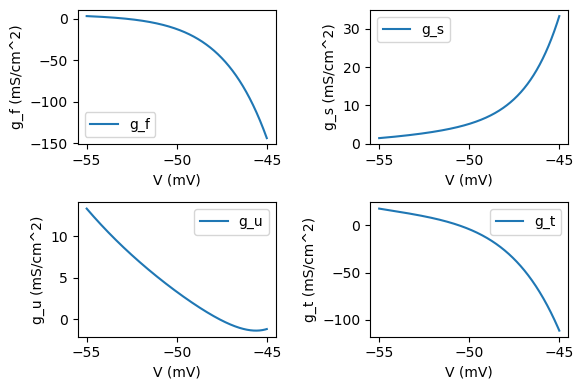

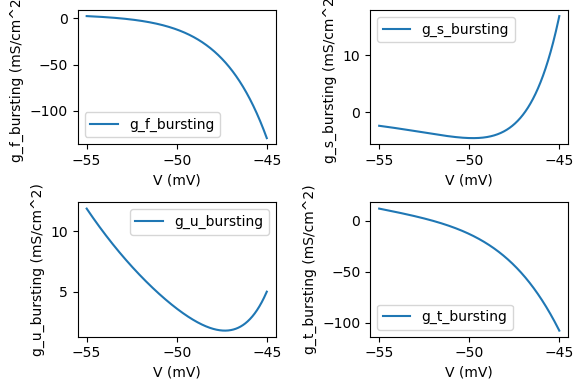

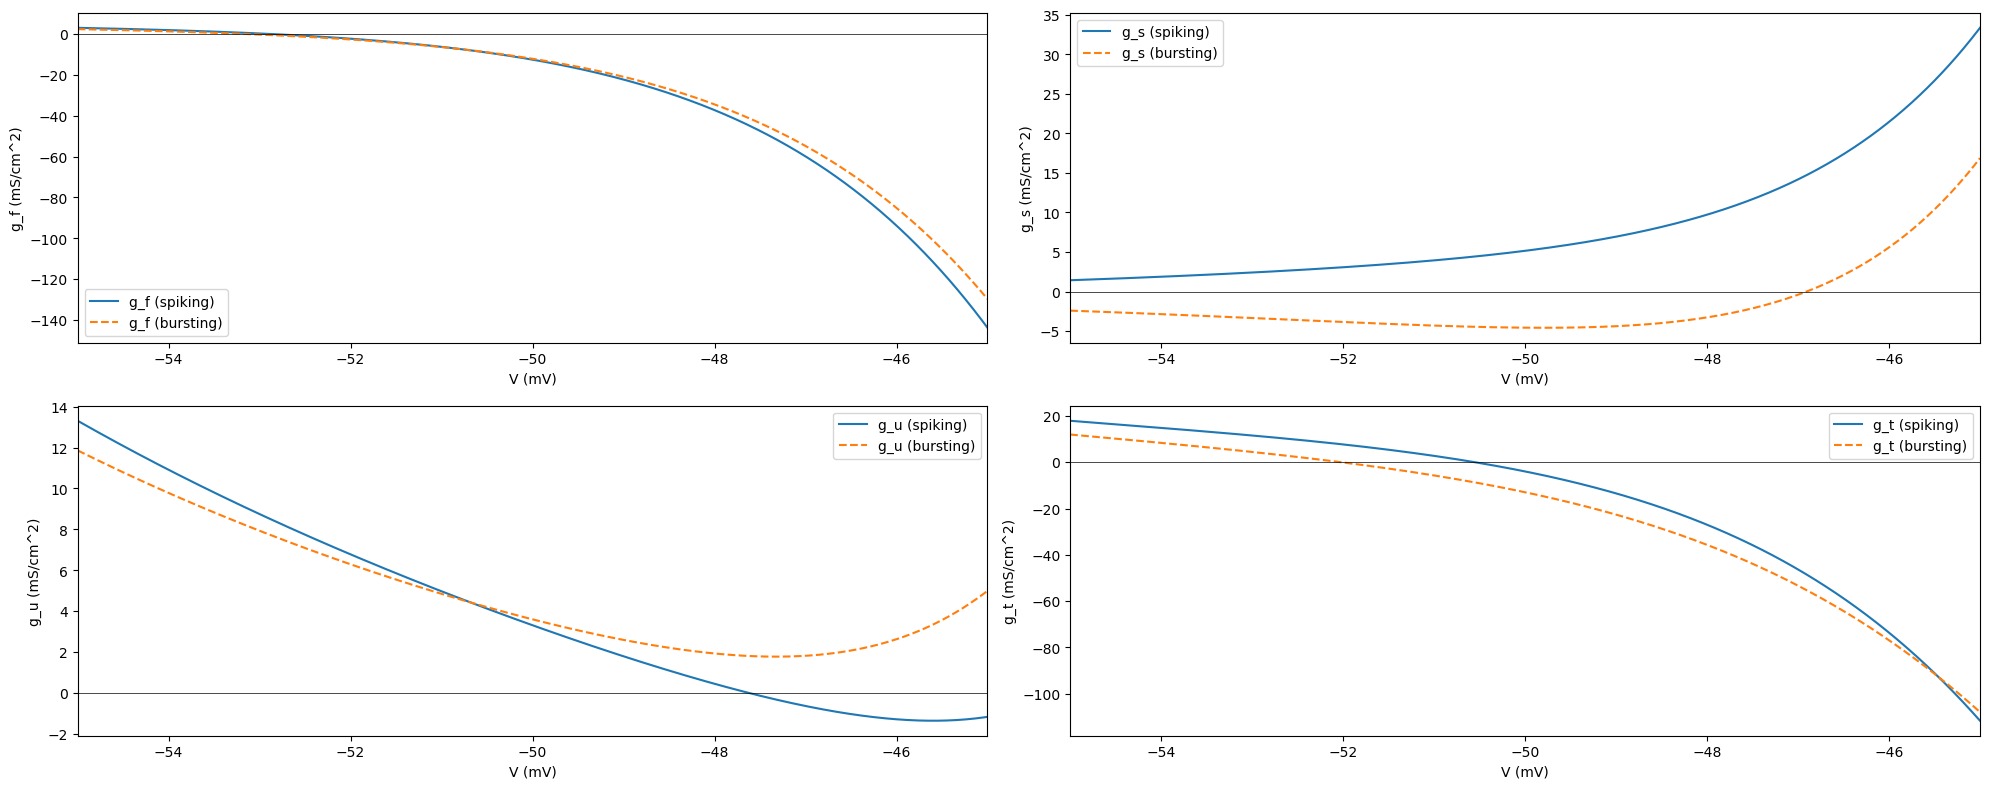

In [22]:
g_spiking = [6.60082471e+03, 1.25961075e+02, 4.14918208e+00, 1.83416405e+01, 1.59677516e+02, 4.13833466e+02, 3.21589451e-01, 9.57712096e-03]
V = np.linspace(-55., -45., 1000)

# plot the DICs
import stg
fig, ax = plt.subplots(2, 2, figsize=(6, 4))
dics = DICs(V, *g_spiking, **get_default_parameters(), normalize=True)
g_f, g_s, g_u, g_t = dics

ax[0, 0].plot(V, g_f, label='g_f')
ax[0, 0].set_xlabel('V (mV)')
ax[0, 0].set_ylabel('g_f (mS/cm^2)')
ax[0, 0].legend()

ax[0, 1].plot(V, g_s, label='g_s')
ax[0, 1].set_xlabel('V (mV)')
ax[0, 1].set_ylabel('g_s (mS/cm^2)')
ax[0, 1].legend()

ax[1, 0].plot(V, g_u, label='g_u')
ax[1, 0].set_xlabel('V (mV)')
ax[1, 0].set_ylabel('g_u (mS/cm^2)')
ax[1, 0].legend()

ax[1, 1].plot(V, g_t, label='g_t')
ax[1, 1].set_xlabel('V (mV)')
ax[1, 1].set_ylabel('g_t (mS/cm^2)')
ax[1, 1].legend()

plt.tight_layout()
plt.show()

g_bursting = [7.45938432e+03, 1.17963369e+02, 6.88126086e+00, 2.71605434e+01, 1.80885559e+02, 2.46613259e+02, 3.62480103e-01, 1.21157579e-02]

# plot the DICs

fig, ax = plt.subplots(2, 2, figsize=(6, 4))
dics = DICs(V, *g_bursting, **get_default_parameters(), normalize=True)
g_f_bursting, g_s_bursting, g_u_bursting, g_t_bursting = dics

ax[0, 0].plot(V, g_f_bursting, label='g_f_bursting')
ax[0, 0].set_xlabel('V (mV)')
ax[0, 0].set_ylabel('g_f_bursting (mS/cm^2)')
ax[0, 0].legend()

ax[0, 1].plot(V, g_s_bursting, label='g_s_bursting')
ax[0, 1].set_xlabel('V (mV)')
ax[0, 1].set_ylabel('g_s_bursting (mS/cm^2)')
ax[0, 1].legend()

ax[1, 0].plot(V, g_u_bursting, label='g_u_bursting')
ax[1, 0].set_xlabel('V (mV)')
ax[1, 0].set_ylabel('g_u_bursting (mS/cm^2)')
ax[1, 0].legend()

ax[1, 1].plot(V, g_t_bursting, label='g_t_bursting')
ax[1, 1].set_xlabel('V (mV)')
ax[1, 1].set_ylabel('g_t_bursting (mS/cm^2)')
ax[1, 1].legend()

plt.tight_layout()
plt.show()



# both on the same 

fig, ax = plt.subplots(2, 2, figsize=(20, 8))

# Plot spiking DICs
ax[0, 0].plot(V, g_f, label='g_f (spiking)')
ax[0, 1].plot(V, g_s, label='g_s (spiking)')
ax[1, 0].plot(V, g_u, label='g_u (spiking)')
ax[1, 1].plot(V, g_t, label='g_t (spiking)')

# Plot bursting DICs
dics_bursting = DICs(V, *g_bursting, **get_default_parameters(), normalize=True)
g_f_bursting, g_s_bursting, g_u_bursting, g_t_bursting = dics_bursting

ax[0, 0].plot(V, g_f_bursting, label='g_f (bursting)', linestyle='--')
ax[0, 1].plot(V, g_s_bursting, label='g_s (bursting)', linestyle='--')
ax[1, 0].plot(V, g_u_bursting, label='g_u (bursting)', linestyle='--')
ax[1, 1].plot(V, g_t_bursting, label='g_t (bursting)', linestyle='--')

# Set labels and legends
for i in range(2):
    for j in range(2):
        ax[i, j].set_xlabel('V (mV)')
        ax[i, j].set_ylabel(f'g_{["f", "s", "u", "t"][i*2+j]} (mS/cm^2)')
        ax[i, j].legend()
        ax[i, j].set_xlim(-55, -45)
        # add a line at 0
        ax[i, j].axhline(0, color='black', lw=0.5)

plt.tight_layout()
# save as svg
plt.savefig('figures/stg_DICs_zoom.svg')
plt.show()

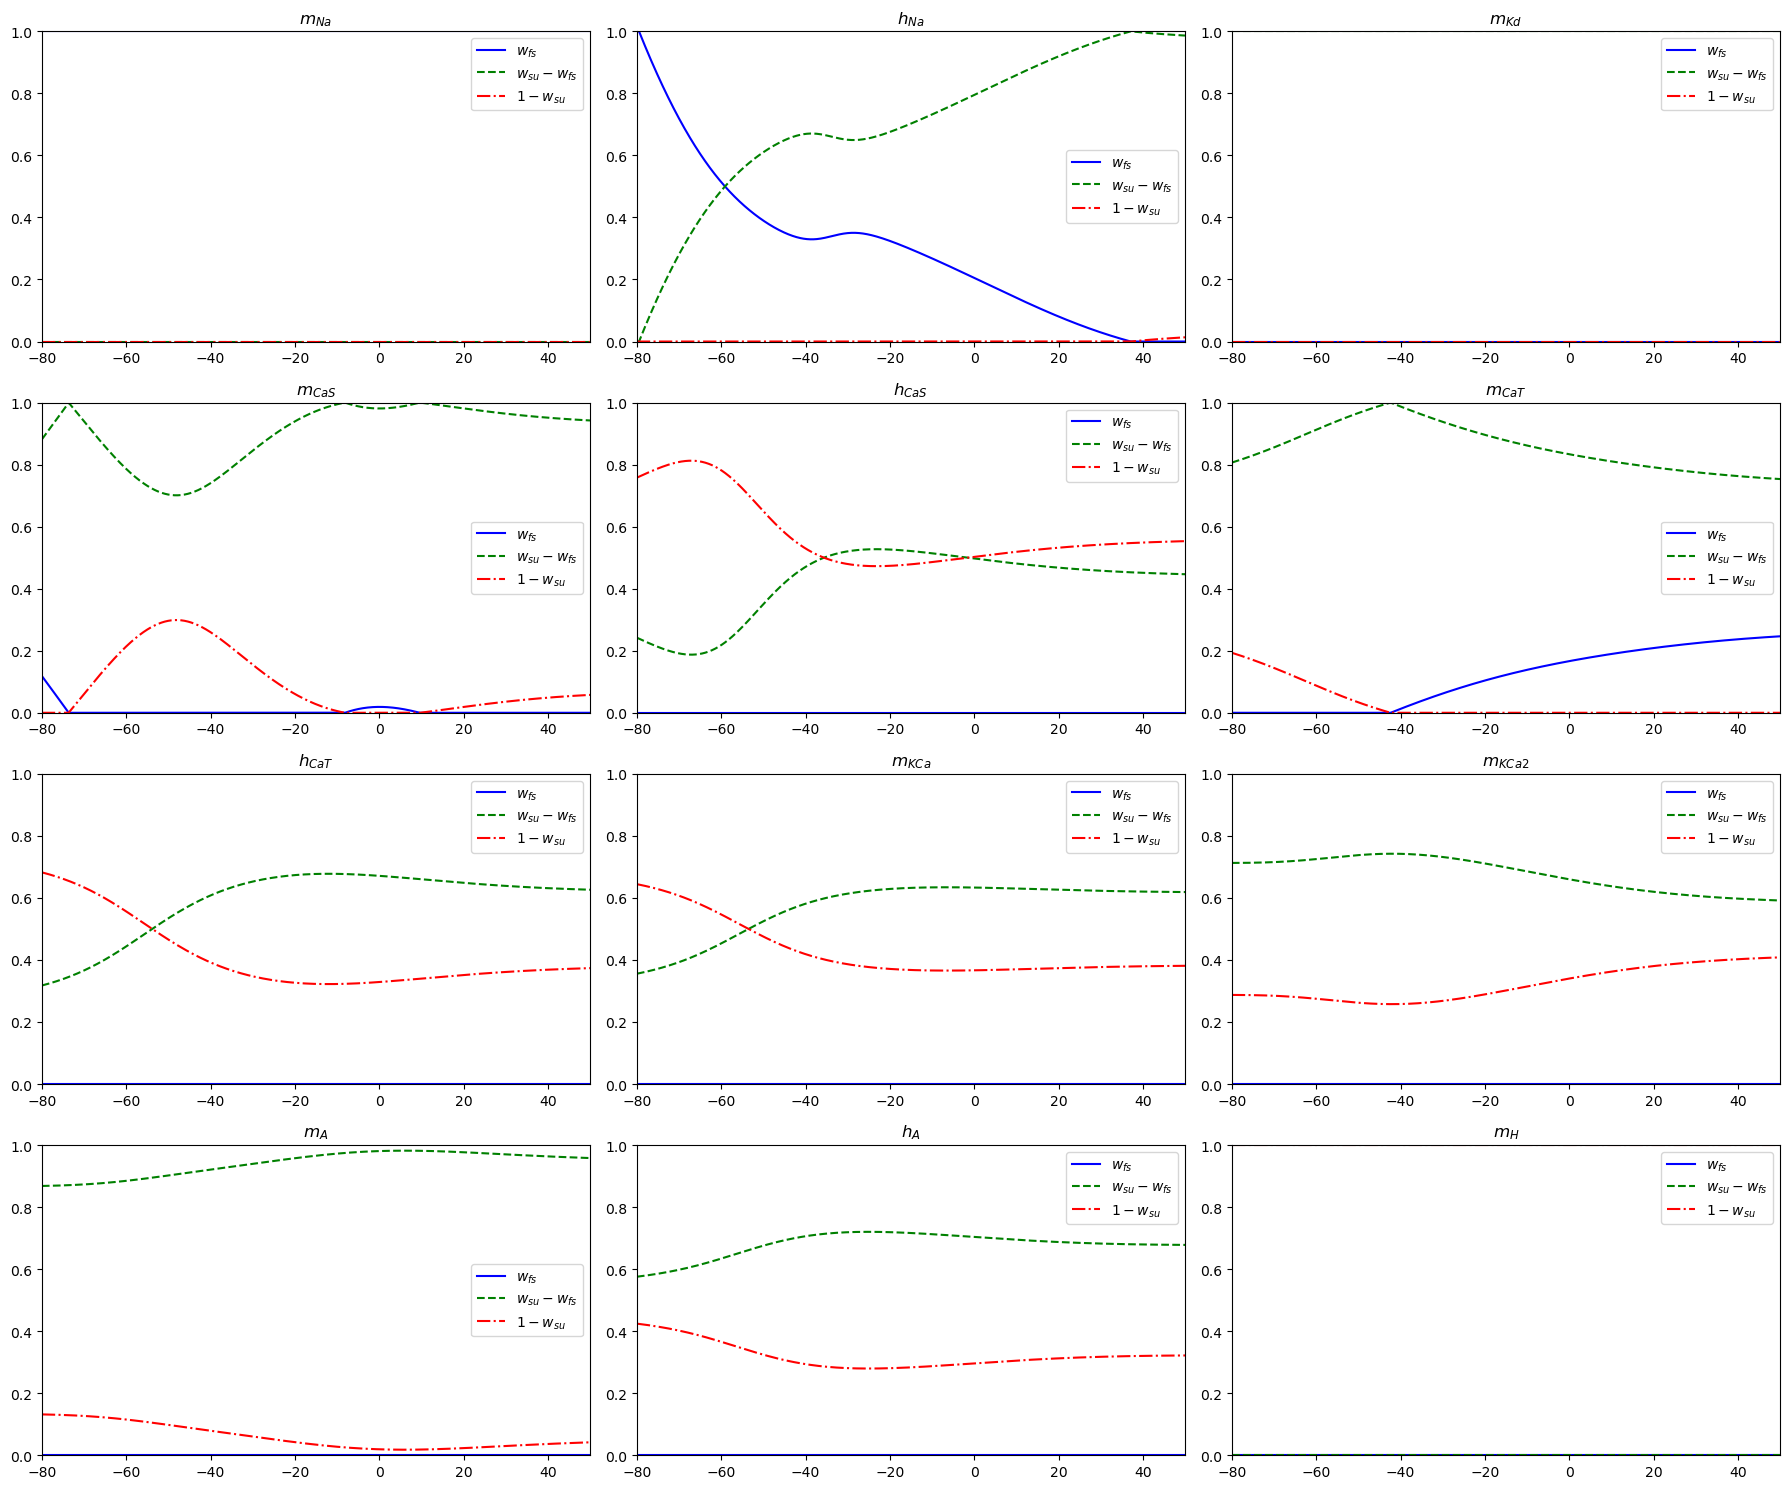

In [23]:
tau_Ca = 20.0
from utils import get_w_factors, get_w_factors_constant_tau

from stg import tau_m_Na, tau_h_Na, tau_m_Kd, tau_m_CaT, tau_h_CaT, tau_m_CaS, tau_h_CaS, tau_m_KCa, tau_m_A, tau_h_A, tau_m_H

V = np.linspace(-80, 50, 1000)

tau_f_stg = tau_m_Na
tau_s_stg = tau_m_Kd
tau_u_stg = tau_m_H

w_fs_m_Na, w_su_m_Na = get_w_factors(V, tau_m_Na, tau_f_stg, tau_s_stg, tau_u_stg)
w_fs_h_Na, w_su_h_Na = get_w_factors(V, tau_h_Na, tau_f_stg, tau_s_stg, tau_u_stg)
w_fs_m_Kd, w_su_m_Kd = get_w_factors(V, tau_m_Kd, tau_f_stg, tau_s_stg, tau_u_stg)
w_fs_m_CaT, w_su_m_CaT = get_w_factors(V, tau_m_CaT, tau_f_stg, tau_s_stg, tau_u_stg)
w_fs_h_CaT, w_su_h_CaT = get_w_factors(V, tau_h_CaT, tau_f_stg, tau_s_stg, tau_u_stg)
w_fs_m_CaS, w_su_m_CaS = get_w_factors(V, tau_m_CaS, tau_f_stg, tau_s_stg, tau_u_stg)
w_fs_h_CaS, w_su_h_CaS = get_w_factors(V, tau_h_CaS, tau_f_stg, tau_s_stg, tau_u_stg)
w_fs_m_KCa, w_su_m_KCa = get_w_factors(V, tau_m_KCa, tau_f_stg, tau_s_stg, tau_u_stg)
w_fs_m_KCa2, w_su_m_KCa2 = get_w_factors_constant_tau(V, tau_Ca, tau_f_stg, tau_s_stg, tau_u_stg)
w_fs_m_A, w_su_m_A = get_w_factors(V, tau_m_A, tau_f_stg, tau_s_stg, tau_u_stg)
w_fs_h_A, w_su_h_A = get_w_factors(V, tau_h_A, tau_f_stg, tau_s_stg, tau_u_stg)
w_fs_m_H, w_su_m_H = get_w_factors(V, tau_m_H, tau_f_stg, tau_s_stg, tau_u_stg)

# for each gating, plot the w factors as:
# w_fs, w_su - w_fs, 1 - w_su
fig, ax = plt.subplots(4, 3, figsize=(18, 3*5))
ax[0, 0].plot(V, w_fs_m_Na, label=r'$w_{fs}$', color='blue', linestyle='-')
ax[0, 0].plot(V, w_su_m_Na - w_fs_m_Na, label=r'$w_{su} - w_{fs}$', color='green', linestyle='--')
ax[0, 0].plot(V, 1 - w_su_m_Na, label=r'$1 - w_{su}$', color='red', linestyle='-.')
ax[0, 0].set_title(r'$m_{Na}$')
ax[0, 0].legend()
ax[0, 1].plot(V, w_fs_h_Na, label=r'$w_{fs}$', color='blue', linestyle='-')
ax[0, 1].plot(V, w_su_h_Na - w_fs_h_Na, label=r'$w_{su} - w_{fs}$', color='green', linestyle='--')
ax[0, 1].plot(V, 1 - w_su_h_Na, label=r'$1 - w_{su}$', color='red', linestyle='-.')
ax[0, 1].set_title(r'$h_{Na}$')
ax[0, 1].legend()
ax[0, 2].plot(V, w_fs_m_Kd, label=r'$w_{fs}$', color='blue', linestyle='-')
ax[0, 2].plot(V, w_su_m_Kd - w_fs_m_Kd, label=r'$w_{su} - w_{fs}$', color='green', linestyle='--')
ax[0, 2].plot(V, 1 - w_su_m_Kd, label=r'$1 - w_{su}$', color='red', linestyle='-.')
ax[0, 2].set_title(r'$m_{Kd}$')
ax[0, 2].legend()
ax[1, 0].plot(V, w_fs_m_CaS, label=r'$w_{fs}$', color='blue', linestyle='-')
ax[1, 0].plot(V, w_su_m_CaS - w_fs_m_CaS, label=r'$w_{su} - w_{fs}$', color='green', linestyle='--')
ax[1, 0].plot(V, 1 - w_su_m_CaS, label=r'$1 - w_{su}$', color='red', linestyle='-.')
ax[1, 0].set_title(r'$m_{CaS}$')
ax[1, 0].legend()
ax[1, 1].plot(V, w_fs_h_CaS, label=r'$w_{fs}$', color='blue', linestyle='-')
ax[1, 1].plot(V, w_su_h_CaS - w_fs_h_CaS, label=r'$w_{su} - w_{fs}$', color='green', linestyle='--')
ax[1, 1].plot(V, 1 - w_su_h_CaS, label=r'$1 - w_{su}$', color='red', linestyle='-.')
ax[1, 1].set_title(r'$h_{CaS}$')
ax[1, 1].legend()
ax[1, 2].plot(V, w_fs_m_CaT, label=r'$w_{fs}$', color='blue', linestyle='-')
ax[1, 2].plot(V, w_su_m_CaT - w_fs_m_CaT, label=r'$w_{su} - w_{fs}$', color='green', linestyle='--')
ax[1, 2].plot(V, 1 - w_su_m_CaT, label=r'$1 - w_{su}$', color='red', linestyle='-.')
ax[1, 2].set_title(r'$m_{CaT}$')
ax[1, 2].legend()
ax[2, 0].plot(V, w_fs_h_CaT, label=r'$w_{fs}$', color='blue', linestyle='-')
ax[2, 0].plot(V, w_su_h_CaT - w_fs_h_CaT, label=r'$w_{su} - w_{fs}$', color='green', linestyle='--')
ax[2, 0].plot(V, 1 - w_su_h_CaT, label=r'$1 - w_{su}$', color='red', linestyle='-.')
ax[2, 0].set_title(r'$h_{CaT}$')
ax[2, 0].legend()
ax[2, 1].plot(V, w_fs_m_KCa, label=r'$w_{fs}$', color='blue', linestyle='-')
ax[2, 1].plot(V, w_su_m_KCa - w_fs_m_KCa, label=r'$w_{su} - w_{fs}$', color='green', linestyle='--')
ax[2, 1].plot(V, 1 - w_su_m_KCa, label=r'$1 - w_{su}$', color='red', linestyle='-.')
ax[2, 1].set_title(r'$m_{KCa}$')
ax[2, 1].legend()
ax[2, 2].plot(V, w_fs_m_KCa2, label=r'$w_{fs}$', color='blue', linestyle='-')
ax[2, 2].plot(V, w_su_m_KCa2 - w_fs_m_KCa2, label=r'$w_{su} - w_{fs}$', color='green', linestyle='--')
ax[2, 2].plot(V, 1 - w_su_m_KCa2, label=r'$1 - w_{su}$', color='red', linestyle='-.')
ax[2, 2].set_title(r'$m_{KCa2}$')
ax[2, 2].legend()
ax[3, 0].plot(V, w_fs_m_A, label=r'$w_{fs}$', color='blue', linestyle='-')
ax[3, 0].plot(V, w_su_m_A - w_fs_m_A, label=r'$w_{su} - w_{fs}$', color='green', linestyle='--')
ax[3, 0].plot(V, 1 - w_su_m_A, label=r'$1 - w_{su}$', color='red', linestyle='-.')
ax[3, 0].set_title(r'$m_{A}$')
ax[3, 0].legend()
ax[3, 1].plot(V, w_fs_h_A, label=r'$w_{fs}$', color='blue', linestyle='-')
ax[3, 1].plot(V, w_su_h_A - w_fs_h_A, label=r'$w_{su} - w_{fs}$', color='green', linestyle='--')
ax[3, 1].plot(V, 1 - w_su_h_A, label=r'$1 - w_{su}$', color='red', linestyle='-.')
ax[3, 1].set_title(r'$h_{A}$')
ax[3, 1].legend()
ax[3, 2].plot(V, w_fs_m_H, label=r'$w_{fs}$', color='blue', linestyle='-')
ax[3, 2].plot(V, w_su_m_H - w_fs_m_H, label=r'$w_{su} - w_{fs}$', color='green', linestyle='--')
ax[3, 2].plot(V, 1 - w_su_m_H, label=r'$1 - w_{su}$', color='red', linestyle='-.')
ax[3, 2].set_title(r'$m_{H}$')
ax[3, 2].legend()

for i in range(4):
    for j in range(3):
        ax[i, j].set_xlim(-80, 50)
        ax[i, j].set_ylim(0, 1)

plt.tight_layout()
# save to svg
plt.savefig('figures/stg_w_factors.svg')
plt.show()

Simulating population (multiprocessing): 100%|██████████| 3/3 [00:02<00:00,  1.24it/s]


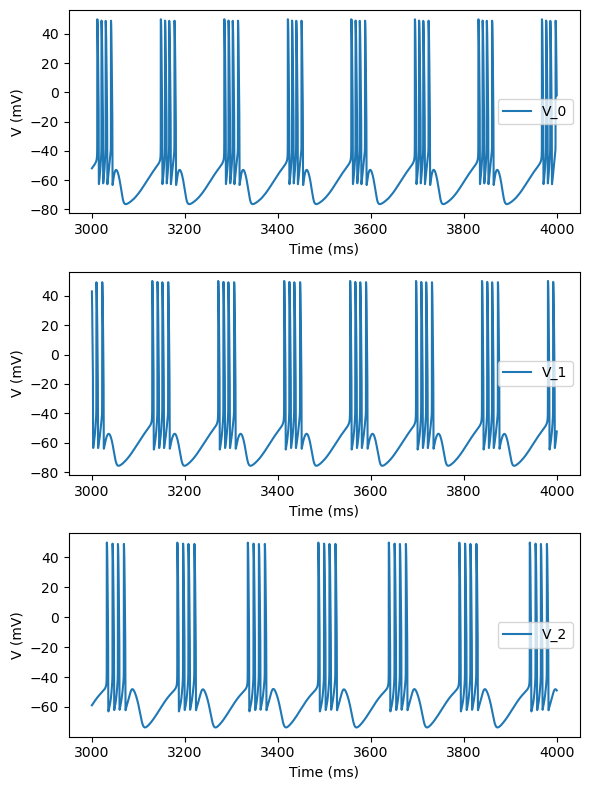

In [24]:
# Generate a degenerate population and show that only V_th matters

from stg import generate_neuromodulated_population
from utils import simulate_population_t_eval_multiprocessing

# Wrapper to simulate the population using multiprocessing
def simulate_population(population, U0 = get_default_u0(), T_EVAL = np.arange(3000, 4500, 0.5), PARAMS=get_default_parameters(), MAX_WORKERS=16):
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=RuntimeWarning)
        return np.asarray(simulate_population_t_eval_multiprocessing(simulate_individual_t_eval, population, U0, T_EVAL, PARAMS, MAX_WORKERS, verbose=True))[:, 1, :]
    
V_th = -51.0

#set seed
np.random.seed(46)

population = generate_neuromodulated_population(3, V_th, -4., 5., iterations=5, set_to_compensate=['A', 'CaS'])
t_eval = np.arange(3000, 4000, 0.05)
sols = simulate_population(population, T_EVAL=t_eval)

# 3 traces
fig, ax = plt.subplots(3, 1, figsize=(6, 8))
for i in range(3):
    ax[i].plot(t_eval, sols[i, :], label=f'V_{i}')
    ax[i].set_xlabel('Time (ms)')
    ax[i].set_ylabel('V (mV)')
    ax[i].legend()
plt.tight_layout()
# save as svg
plt.savefig('figures/deg_population_traces.svg')
plt.show()

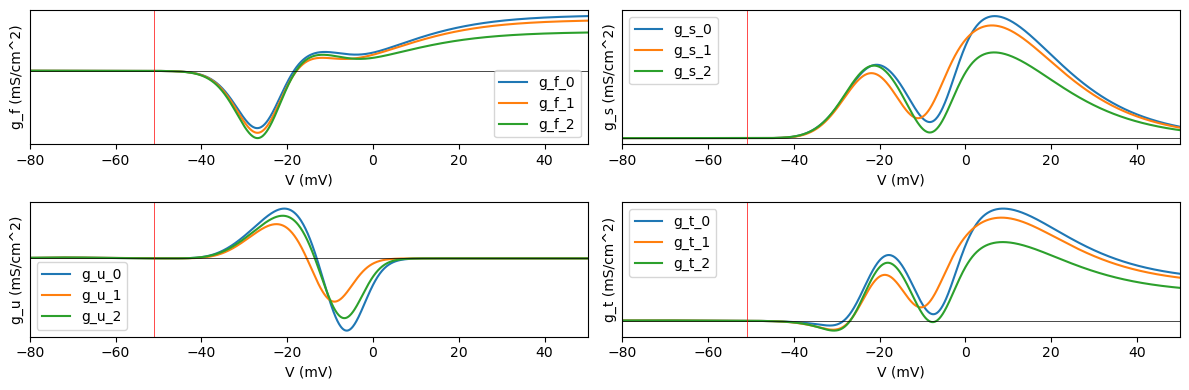

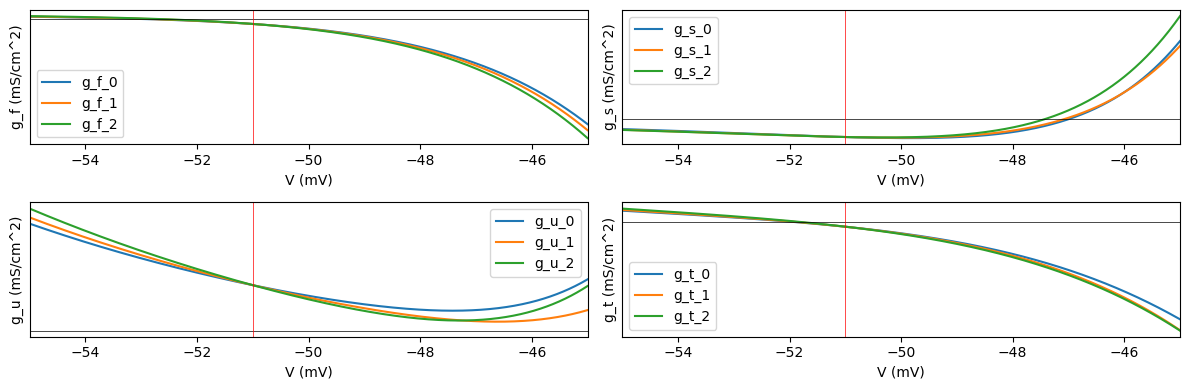

In [25]:

# DICs of the population
V = np.linspace(-80, 50, 1000)
dics = DICs(V, *(population.T), **get_default_parameters(), normalize=True)
g_f, g_s, g_u, g_t = dics

fig, ax = plt.subplots(2, 2, figsize=(12, 4))
for i in range(3):
    ax[0, 0].plot(V, g_f[i], label=f'g_f_{i}')
    ax[0, 1].plot(V, g_s[i], label=f'g_s_{i}')
    ax[1, 0].plot(V, g_u[i], label=f'g_u_{i}')
    ax[1, 1].plot(V, g_t[i], label=f'g_t_{i}')

for i in range(2):
    for j in range(2):
        ax[i, j].set_xlabel('V (mV)')
        ax[i, j].set_ylabel(f'g_{["f", "s", "u", "t"][i*2+j]} (mS/cm^2)')
        ax[i, j].legend()
        ax[i, j].set_xlim(-80, 50)
        # add a line at 0
        ax[i, j].axhline(0, color='black', lw=0.5)
        ax[i,j].set_yticks([])
        # vline at -51
        ax[i, j].axvline(-51, color='red', lw=0.5)

plt.tight_layout()
# save as svg
plt.savefig('figures/deg_population_DICs.svg')
plt.show()

# zoom around -51 mV
V = np.linspace(-55, -45, 1000)
dics_zoom = DICs(V, *(population.T), **get_default_parameters(), normalize=True)
g_f_zoom, g_s_zoom, g_u_zoom, g_t_zoom = dics_zoom

fig, ax = plt.subplots(2, 2, figsize=(12, 4))
for i in range(3):
    ax[0, 0].plot(V, g_f_zoom[i], label=f'g_f_{i}')
    ax[0, 1].plot(V, g_s_zoom[i], label=f'g_s_{i}')
    ax[1, 0].plot(V, g_u_zoom[i], label=f'g_u_{i}')
    ax[1, 1].plot(V, g_t_zoom[i], label=f'g_t_{i}')

for i in range(2):
    for j in range(2):
        ax[i, j].set_xlabel('V (mV)')
        ax[i, j].set_ylabel(f'g_{["f", "s", "u", "t"][i*2+j]} (mS/cm^2)')
        ax[i, j].legend()
        ax[i, j].set_xlim(-55, -45)
        # add a line at 0
        ax[i, j].axhline(0, color='black', lw=0.5)
        ax[i, j].set_yticks([])
        # vline at -51
        ax[i, j].axvline(-51, color='red', lw=0.5)

plt.tight_layout()
# save as svg
plt.savefig('figures/deg_population_DICs_zoom.svg')
plt.show()

(3, 3, 7) (3, 7)
[[0.0415957  0.73274546 0.35938939]
 [0.02668066 0.46396286 0.22836517]
 [0.01371628 0.24223123 0.11872616]]


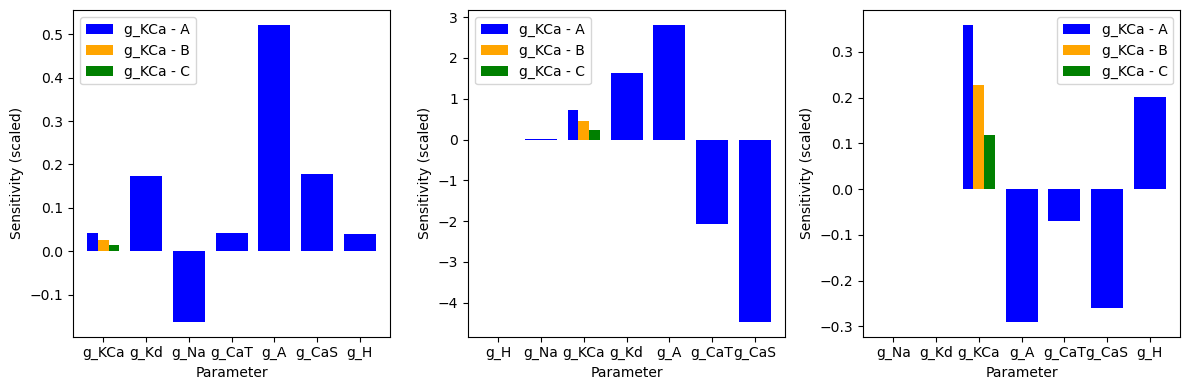

In [26]:
# Sensitivity matrix with scaling factors
from stg import sensitivity_matrix

V = -51.0

population[2] = g_spiking

scaling_factors = np.array([1e3, 1e4, 1e2, 1e2, 1e4, 1e3, 1e-1]) * 10  # Example scaling factors
sens_mat = sensitivity_matrix(V, *(population.T), **get_default_parameters(), normalize=False).squeeze()[:, :, :-1]


# Get sorted indices for each row
sorted_indices = np.argsort(np.abs(sens_mat[0]))

# Apply scaling factors
sens_mat = sens_mat * scaling_factors  
print(sens_mat.shape, sorted_indices.shape)

print(sens_mat[:, :, 4])

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
width = 0.25  # Width for split bars
full_width = 0.75  # Width for normal bars
x_labels = ['g_Na', 'g_Kd', 'g_CaT', 'g_CaS', 'g_KCa', 'g_A', 'g_H']
x = np.arange(len(x_labels))  # Base x positions

for i in range(3):
    values = sens_mat[0, i, sorted_indices[i]]  # Sorted values
    sorted_labels = [x_labels[j] for j in sorted_indices[i]]  # Sorted labels
    
    # Find the position of 'g_KCa' after sorting
    kca_index = sorted_labels.index('g_KCa')  

    for j in range(7):  
        if j == kca_index:  # If it's the g_KCa bar
            sub_values = [sens_mat[0, i, 4], sens_mat[1, i, 4], sens_mat[2, i, 4]]
            ax[i].bar(j - width, sub_values[0], width, color='blue', label=f'{sorted_labels[j]} - A')
            ax[i].bar(j, sub_values[1], width, color='orange', label=f'{sorted_labels[j]} - B')
            ax[i].bar(j + width, sub_values[2], width, color='green', label=f'{sorted_labels[j]} - C')
        else:
            ax[i].bar(j, values[j], full_width, color='blue')  # Keep full width for other bars

    ax[i].set_xlabel('Parameter')
    ax[i].set_ylabel('Sensitivity (scaled)')
    ax[i].set_xticks(np.arange(7))
    ax[i].set_xticklabels(sorted_labels)
    ax[i].legend()


plt.tight_layout()
plt.savefig('figures/sensitivity_vth_scaled.svg')
plt.show()

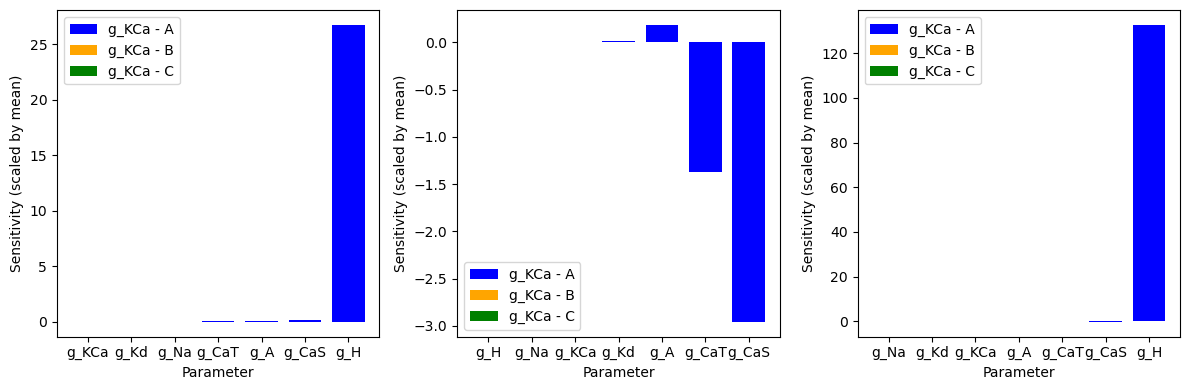

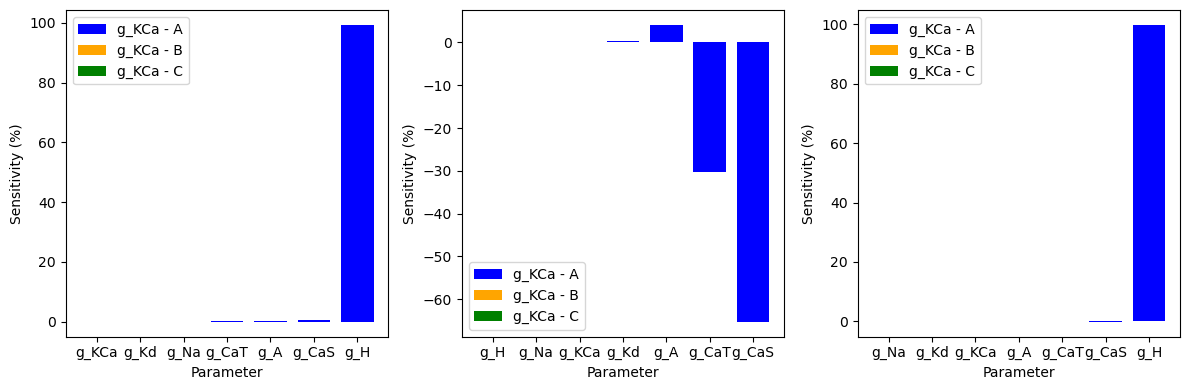

In [27]:
# == Not in the manuscript, but I wonder what is the sensitivity weighted by the mean order of magnitude of the parameters
# below the distribution, we compute the mean and multiply the sensitivity by the mean
g_bar_range_Na = [0, 8000]
g_bar_range_Kd = [0, 350]
g_bar_range_CaT = [0, 12]
g_bar_range_CaS = [0, 50]
g_bar_range_KCa = [0, 250]
g_bar_range_A = [0, 600]
g_bar_range_H = [0, 0.7]
g_bar_range_leak = [0, 0.02]

g_bar_ranges = [g_bar_range_Na, g_bar_range_Kd, g_bar_range_CaT, g_bar_range_CaS, g_bar_range_KCa, g_bar_range_A, g_bar_range_H]

# Compute the mean of the ranges
mean_g_bar = np.mean([np.mean(g_bar_range) for g_bar_range in g_bar_ranges])

# Apply the mean to the sensitivity matrix and undo the scaling
sens_mat_scaled = sens_mat * mean_g_bar / scaling_factors

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
width = 0.25  # Width for split bars
for i in range(3):
    values = sens_mat_scaled[0, i, sorted_indices[i]]  # Sorted values
    sorted_labels = [x_labels[j] for j in sorted_indices[i]]  # Sorted labels
    
    # Find the position of 'g_KCa' after sorting
    kca_index = sorted_labels.index('g_KCa')  

    for j in range(7):  
        if j == kca_index:  # If it's the g_KCa bar
            sub_values = [sens_mat_scaled[0, i, 4], sens_mat_scaled[1, i, 4], sens_mat_scaled[2, i, 4]]
            ax[i].bar(j - width, sub_values[0], width, color='blue', label=f'{sorted_labels[j]} - A')
            ax[i].bar(j, sub_values[1], width, color='orange', label=f'{sorted_labels[j]} - B')
            ax[i].bar(j + width, sub_values[2], width, color='green', label=f'{sorted_labels[j]} - C')
        else:
            ax[i].bar(j, values[j], full_width, color='blue')  # Keep full width for other bars

    ax[i].set_xlabel('Parameter')
    ax[i].set_ylabel('Sensitivity (scaled by mean)')
    ax[i].set_xticks(np.arange(7))
    ax[i].set_xticklabels(sorted_labels)
    ax[i].legend()

plt.tight_layout()
plt.show()

# ==> We find back result from my global sensitivity analysis of the UQSM class https://github.com/julienbrandoit/MECA0010---Stochastic-Sensitivity-Analysis-of-Dynamic-Input-Conductances

# redo but normalize to see the percentage of the sensitivity
# Normalize the sensitivity matrix to see the percentage contribution
sens_mat_normalized = sens_mat_scaled / np.sum(np.abs(sens_mat_scaled), axis=2, keepdims=True) * 100

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
width = 0.25  # Width for split bars
for i in range(3):
    values = sens_mat_normalized[0, i, sorted_indices[i]]  # Sorted values
    sorted_labels = [x_labels[j] for j in sorted_indices[i]]  # Sorted labels
    
    # Find the position of 'g_KCa' after sorting
    kca_index = sorted_labels.index('g_KCa')  

    for j in range(7):  
        if j == kca_index:  # If it's the g_KCa bar
            sub_values = [sens_mat_normalized[0, i, 4], sens_mat_normalized[1, i, 4], sens_mat_normalized[2, i, 4]]
            ax[i].bar(j - width, sub_values[0], width, color='blue', label=f'{sorted_labels[j]} - A')
            ax[i].bar(j, sub_values[1], width, color='orange', label=f'{sorted_labels[j]} - B')
            ax[i].bar(j + width, sub_values[2], width, color='green', label=f'{sorted_labels[j]} - C')
        else:
            ax[i].bar(j, values[j], full_width, color='blue')  # Keep full width for other bars

    ax[i].set_xlabel('Parameter')
    ax[i].set_ylabel('Sensitivity (%)')
    ax[i].set_xticks(np.arange(7))
    ax[i].set_xticklabels(sorted_labels)
    ax[i].legend()

plt.tight_layout()
plt.show()